<a href="https://colab.research.google.com/github/awitz23/LinkedIn/blob/main/Graph_Cutsperday_mehr_Grafiken.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q rectpack

In [2]:
import pandas as pd
import numpy as np
import re
import rectpack.guillotine as guillotine
import glob
import matplotlib.patches as patches
import rectpack.packer as packer


from heapq import nsmallest

%matplotlib inline
# Visualize
from plotnine import *
import matplotlib.patches as patches
import seaborn as sns



#from rectpack.packer import PackerBNF, PackerBFF, PackerBBF, PackerOnlineBNF
#from rectpack.packer import SORT_NONE, SORT_AREA, SORT_PERI, SORT_DIFF, SORT_SSIDE, SORT_LSIDE, SORT_RATIO
from matplotlib import pyplot as plt
from rectpack import newPacker
from os import listdir
from os.path import isfile, join
from pathlib import Path
M = 50000    # big M ist eine sehr große Zahl

In [3]:
pd.options.mode.chained_assignment = None  # default='warn'

from google.colab import drive
drive.mount('/content/drive')

# Pfad zu einem Ordner mit mehreren Dateien
data_path = r"/content/drive/MyDrive/PJS/01_Input/Daten_v1_clean/06_Datagraphs/Cutsperday2.csv"
data_path_team1 = r"/content/drive/MyDrive/PJS/01_Input/Daten_v1_clean/06_Datagraphs/Cutsperday2.csv"

Mounted at /content/drive


In [4]:
def loadData(data_path):
  df = pd.DataFrame(pd.read_csv(data_path, sep=';'))
  return df

data = loadData(data_path)

In [7]:
print(data)

    Day  Month  Cuts          Type  Days
0     5      1    65  Optimization     1
1     7      1   313  Optimization     2
2    10      1   239  Optimization     3
3    11      1   218  Optimization     4
4    12      1   145  Optimization     5
..  ...    ...   ...           ...   ...
67    2      2   152    Flyeralarm    20
68    3      2   363    Flyeralarm    21
69    4      2   301    Flyeralarm    22
70    8      2   215    Flyeralarm    23
71    9      2   299    Flyeralarm    24

[72 rows x 5 columns]


In [5]:
data['Days']=[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

In [8]:
data.to_csv("data.csv")

In [ ]:
sns.set_style('darkgrid')
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.scatterplot(data=data, x="Days", y="Cuts", hue="Type")
plt.savefig('saving-a-high-resolution-seaborn-plot.png', dpi=300)

#Spielerei

In [13]:
data = [[-5,"Heuristik-FLYERALARM"],
[139,"Heuristik-FLYERALARM"],
[134,"Heuristik-FLYERALARM"],
[-35,"Heuristik-FLYERALARM"],
[26,"Heuristik-FLYERALARM"],
[92,"Heuristik-FLYERALARM"],
[35,"Heuristik-FLYERALARM"],
[96,"Heuristik-FLYERALARM"],
[82,"Heuristik-FLYERALARM"],
[214,"Heuristik-FLYERALARM"],
[103,"Heuristik-FLYERALARM"],
[63,"Heuristik-FLYERALARM"],
[140,"Heuristik-FLYERALARM"],
[119,"Heuristik-FLYERALARM"],
[105,"Heuristik-FLYERALARM"],
[98,"Heuristik-FLYERALARM"],
[89,"Heuristik-FLYERALARM"],
[95,"Heuristik-FLYERALARM"],
[33,"Heuristik-FLYERALARM"],
[3,"Heuristik-FLYERALARM"],
[231,"Heuristik-FLYERALARM"],
[162,"Heuristik-FLYERALARM"],
[78,"Heuristik-FLYERALARM"],
[132,"Heuristik-FLYERALARM"],
[-39,"Optimierung-FLYERALARM"],
[-119,"Optimierung-FLYERALARM"],
[-95,"Optimierung-FLYERALARM"],
[-136,"Optimierung-FLYERALARM"],
[-60,"Optimierung-FLYERALARM"],
[-89,"Optimierung-FLYERALARM"],
[-13,"Optimierung-FLYERALARM"],
[-71,"Optimierung-FLYERALARM"],
[-15,"Optimierung-FLYERALARM"],
[-26,"Optimierung-FLYERALARM"],
[-20,"Optimierung-FLYERALARM"],
[-57,"Optimierung-FLYERALARM"],
[-62,"Optimierung-FLYERALARM"],
[-31,"Optimierung-FLYERALARM"],
[-28,"Optimierung-FLYERALARM"],
[-17,"Optimierung-FLYERALARM"],
[-45,"Optimierung-FLYERALARM"],
[-26,"Optimierung-FLYERALARM"],
[-57,"Optimierung-FLYERALARM"],
[-46,"Optimierung-FLYERALARM"],
[-67,"Optimierung-FLYERALARM"],
[-44,"Optimierung-FLYERALARM"],
[-17,"Optimierung-FLYERALARM"],
[-32,"Optimierung-FLYERALARM"]]

In [18]:
df = pd.DataFrame(data, columns=['Deviation', 'Category'])

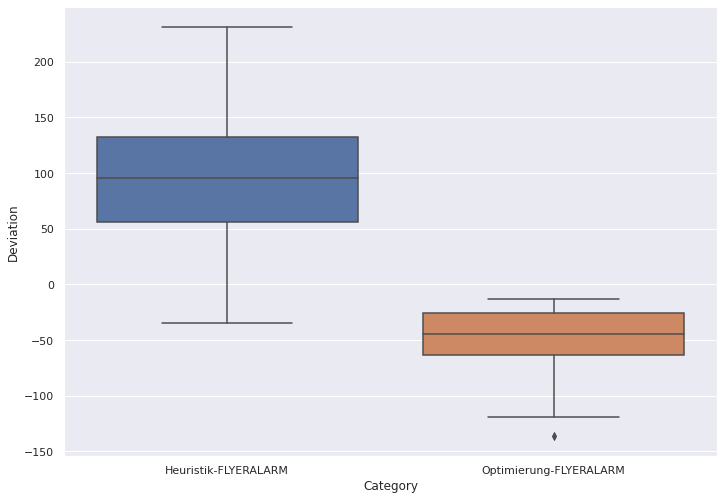

In [20]:
import seaborn as sns

sns.boxplot( x=df["Category"], y=df["Deviation"] )
plt.savefig('deviation.png', dpi=300)